## Read Dataset

In [3]:
import numpy as np 
import pandas as pd

DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Analysis

In [4]:
print('length of data is', len(df))

length of data is 1600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

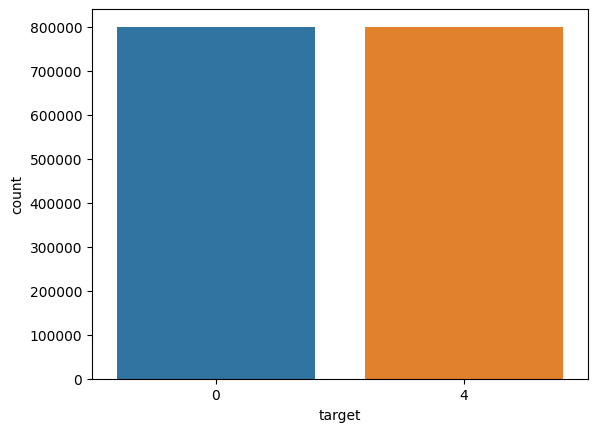

In [8]:
import seaborn as sns
sns.countplot(data=df,x='target')

## Data Preprocessing

In [9]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
pd.options.mode.chained_assignment = None
data['target'] = data['target'].replace(4,1) # 1 positive sentiment
data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [11]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0] #Separating positive and negative tweets
dataset = pd.concat([data_pos, data_neg])
dataset.shape # 80000 each +ve & -ve sentiment

(1600000, 2)

In [12]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


### Making sentiments lower case

In [13]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

### Removing stopwords

In [15]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Cleaning and removing punctuations

In [16]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

### Cleaning and removing repeating characters

In [17]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

### Cleaning and removing URL’s

In [18]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

### Cleaning and removing Numeric numbers

In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

799995    sick spending day laying bed listening taylorswif
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

### Getting tokenization of tweet text

In [20]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [21]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

In [22]:
dataset['text'].tail()

799995    [sick, spending, day, laying, bed, listening, ...
799996                                        [gmail, down]
799997                           [rest, peace, farrah, sad]
799998    [ericurbane, sounds, like, rival, flagging, ad...
799999    [resit, exams, over, summer, wishes, worked, h...
Name: text, dtype: object

In [23]:
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

### Applying Stemming

In [24]:
import nltk
from functools import lru_cache
st = nltk.PorterStemmer()
stem = lru_cache(maxsize=50000)(st.stem)
def stemming_on_text(data):
    text = [stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

### Applying Lemmatizer

In [25]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [26]:
lm = nltk.WordNetLemmatizer()
lemmatize = lru_cache(maxsize=50000)(lm.lemmatize)
def lemmatizer_on_text(data):
    text = [lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [27]:
dataset.head()

,text,target
800000,"[love, healthuandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, effect, everyone]",1


### Separating input feature and label

In [28]:
dataset[dataset['target']==0]['text']

0         [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1         [upset, cant, update, facebook, texting, it, m...
2         [kenichan, dived, many, times, ball, managed, ...
3                   [whole, body, feels, itchy, like, fire]
4         [nationwideclass, no, its, not, behaving, all,...
                                ...                        
799995    [sick, spending, day, laying, bed, listening, ...
799996                                        [gmail, down]
799997                           [rest, peace, farrah, sad]
799998    [ericurbane, sounds, like, rival, flagging, ad...
799999    [resit, exams, over, summer, wishes, worked, h...
Name: text, Length: 800000, dtype: object

### Plot a cloud of words for negative tweets

(-0.5, 1599.5, 799.5, -0.5)

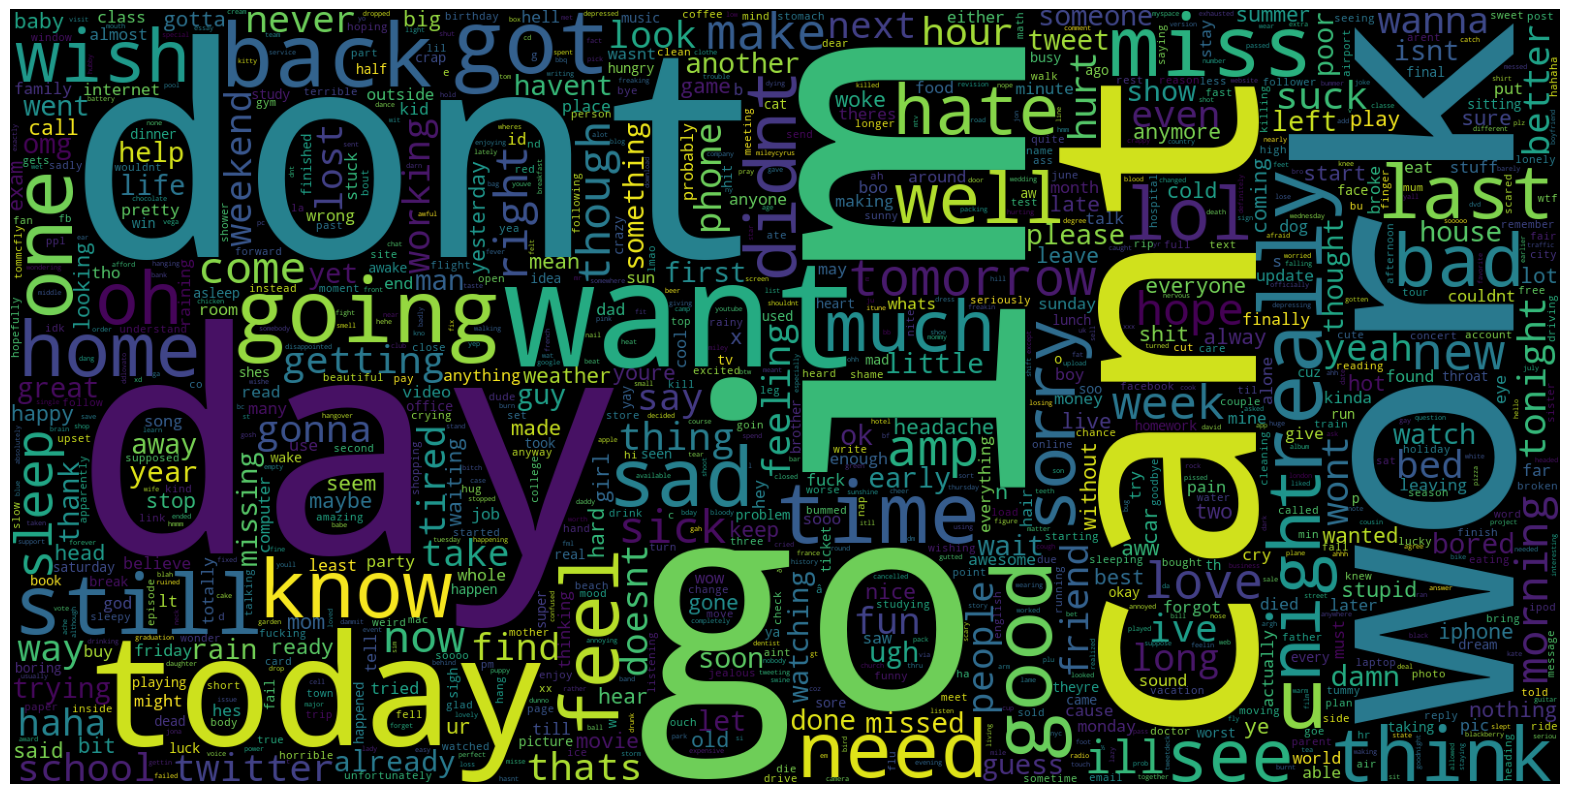

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

### Plot a cloud of words for positive tweets

(-0.5, 1599.5, 799.5, -0.5)

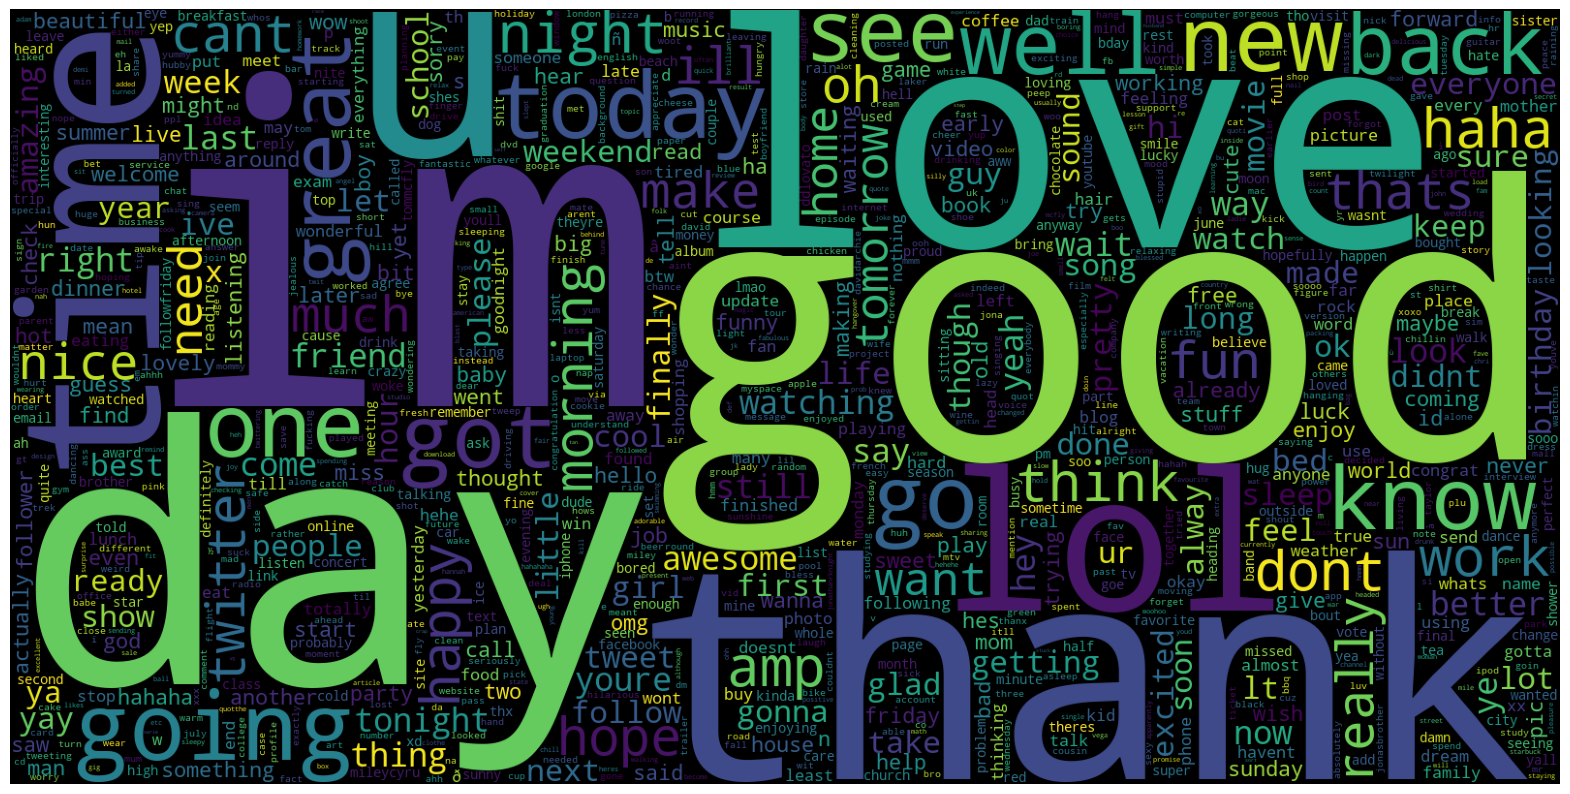

In [30]:
data_neg = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [31]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl ...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1


In [32]:
max_features = 5000
tokenizer_keras = Tokenizer(num_words=max_features, split=' ')
tokenizer_keras.fit_on_texts(new_data['text'].values)
X = tokenizer_keras.texts_to_sequences(new_data['text'].values)
X = pad_sequences(X)
y = pd.get_dummies(new_data['target']).values

### Splitting our data into Train and Test Subset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,
                                                    random_state =0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1120000, 34)
(480000, 34)
(1120000, 2)
(480000, 2)


In [34]:
validation_size = 240000

X_validate = X_test[-validation_size:]
y_validate = y_test[-validation_size:]
X_test = X_test[:-validation_size]
y_test = y_test[:-validation_size]

## LSTM Classifier

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, CuDNNLSTM, SpatialDropout1D
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(CuDNNLSTM(lstm_out))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 34, 128)          0         
 ropout1D)                                                       
                                                                 
 cu_dnnlstm (CuDNNLSTM)      (None, 196)               255584    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 895,978
Trainable params: 895,978
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", pati ence=5,
                                        restore_best_weights=True)
history = model.fit(X_train, y_train, epochs = 20, batch_size=64, verbose = 2, validation_data=(X_validate, y_validate),
                    callbacks=[earlystopping])

Epoch 1/20
35000/35000 - 191s - loss: 0.4452 - accuracy: 0.7909 - val_loss: 0.4248 - val_accuracy: 0.8032 - 191s/epoch - 5ms/step
Epoch 2/20
35000/35000 - 163s - loss: 0.4209 - accuracy: 0.8047 - val_loss: 0.4190 - val_accuracy: 0.8066 - 163s/epoch - 5ms/step
Epoch 3/20
35000/35000 - 162s - loss: 0.4119 - accuracy: 0.8103 - val_loss: 0.4162 - val_accuracy: 0.8076 - 162s/epoch - 5ms/step
Epoch 4/20
35000/35000 - 162s - loss: 0.4064 - accuracy: 0.8133 - val_loss: 0.4177 - val_accuracy: 0.8081 - 162s/epoch - 5ms/step
Epoch 5/20
35000/35000 - 160s - loss: 0.3996 - accuracy: 0.8169 - val_loss: 0.4183 - val_accuracy: 0.8090 - 160s/epoch - 5ms/step
Epoch 7/20
35000/35000 - 160s - loss: 0.3979 - accuracy: 0.8179 - val_loss: 0.4172 - val_accuracy: 0.8093 - 160s/epoch - 5ms/step
Epoch 8/20
35000/35000 - 161s - loss: 0.3963 - accuracy: 0.8189 - val_loss: 0.4193 - val_accuracy: 0.8091 - 161s/epoch - 5ms/step
Epoch 9/20
35000/35000 - 161s - loss: 0.3954 - accuracy: 0.8194 - val_loss: 0.4190 - val_a

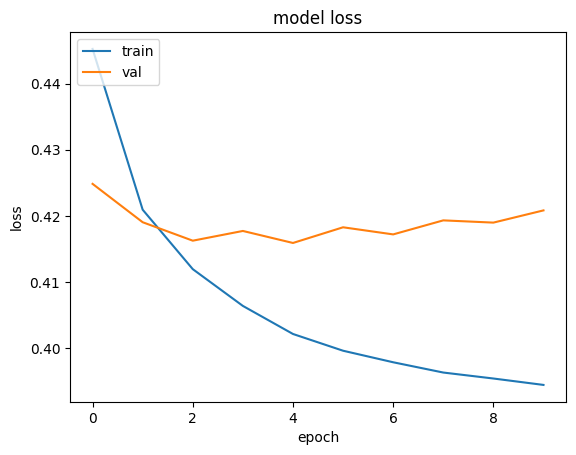

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 64)
print("score: %.2f" % (score))
print("accuracy : %.2f" % (acc))
y_pred = model.predict(X_test)
cfm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), normalize='pred')
print(cfm)

7500/7500 - 17s - loss: 0.4147 - accuracy: 0.8086 - 17s/epoch - 2ms/step
score: 0.41
accuracy : 0.81
7500/7500 [==============================] - 15s 2ms/step
[[0.82022861 0.20228882]
 [0.17977139 0.79771118]]


<Axes: >

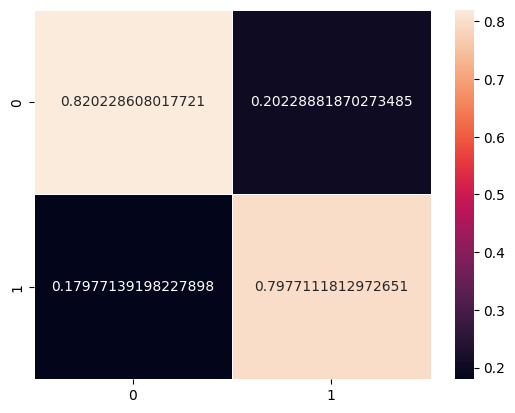

In [42]:
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

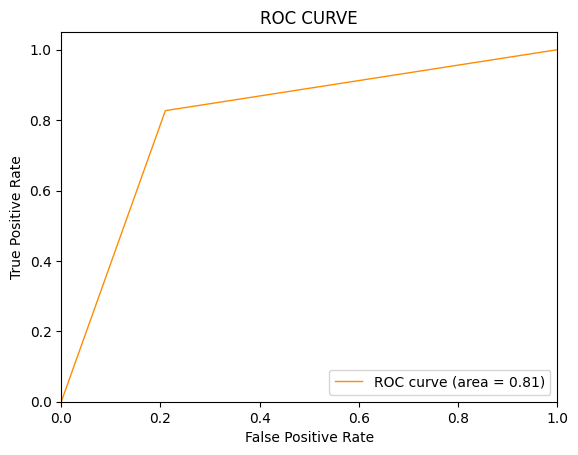

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()